# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- **Name:** César Alán Silva Ramos

- **ID:** A01252916

- **My carreer:** ITC


# Importing libraries

In [81]:

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans


# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# PART 1
# Use your assigned dataset

## A1 Load data

In [118]:

path = "../../Evidencia/A01252916_X.csv"
# Load the dataset
dataset = pd.read_csv(path)
df  =  pd.DataFrame(dataset)

## A2 Data managment


Print the first 7 rows

In [20]:

# Dropping down the enumeration column since it will not be needed (pandas provides enumaration for us)
df.drop(df.columns[0], axis=1, inplace=True)
print(df.head(7))

          x1         x2        x3        x4        x5        x6
0  -9.057568   6.553517 -2.345535  5.268742 -5.674122  7.246045
1   5.150240  -6.631250  6.929999  5.063229 -7.103421  7.538583
2   8.713683   1.365881  5.701664  4.417548  2.304620  1.548344
3  -6.287309  11.942883 -3.584037  5.782358 -8.207444  6.957514
4  14.031601   0.033514  2.021836  7.172337  0.146299  1.010852
5  14.392301  -2.445288  6.204945  9.128148  3.637499 -0.175137
6   6.698125  -6.640512  7.314994  3.971063 -8.829055  4.408536


Print the last 4 rows

In [21]:
print(df.tail(3))

            x1        x2        x3        x4        x5        x6
481   9.875170 -3.095101  8.272779  5.920676  2.276206 -0.165893
482  -9.874675 -1.336498 -2.529602  9.364319  7.331738 -7.366881
483 -13.327721 -1.438151 -3.868086  6.196050  5.637884 -8.904069


How many rows and columns are in your data?

Use the `shape` method


The dataset has 484 rows and 6 columns (Note: 6 columns due to enumaration column drop down)

In [22]:
df.shape

(484, 6)

Print the name of all columns

Use the `columns` method

In [23]:
print (df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [24]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
dtype: object

What is the meaning of rows and columns?

The rows in our dataset correspond to observations made, while the columns represent various variables associated with these observations. Despite the limited details on the specific information collected, we can still draw inferences and conduct analyses. It appears that each variable, across all columns, contains real numbers with decimals. We will verify and delve deeper into tHE range and its implications during our analysis.

Print a statistical summary of your columns


In [28]:
df.describe()

,x1,x2,x3,x4,x5,x6
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,-0.000575,0.412510,1.908520,6.959249,-0.692970,1.333735
std,8.741649,6.033917,6.347790,2.001007,7.393252,6.249406
min,-14.796715,-10.615483,-9.867379,2.009282,-12.087349,-13.206941
25%,-8.415324,-4.264790,-3.958052,5.605897,-7.355008,-3.680629
50%,0.223513,-0.998944,2.390067,7.051033,-1.395191,3.292495
75%,8.250573,5.312115,7.780672,8.392168,5.654114,6.139257
max,16.506805,13.477236,13.457468,13.249692,14.030538,12.095958


# 1) What is the minumum and maximum values of each variable
* Minimun for x1: -14.796715
* Minimun for x2: -10.615483	
* Minimun for x3: -9.867379
* Minimun for x4: 2.009282
* Minimun for x5: -12.087349
* Minimun for x6: -13.206941  
---
* Maximum for x1: 16.506805
* Maximum for x2: 13.477236	
* Maximum for x3: 13.457468	
* Maximum for x4: 13.249692
* Maximum for x5: 14.030538
* Maximum for x6: 12.095958


# 2) What is the mean and standar deviation of each variable

* Mean for x1: -0.000574638111153547
* Mean for x2: 0.41251048932124573
* Mean for x3: 1.9085195295403903
* Mean for x4: 6.959249274960035
* Mean for x5: -0.6929701567129277
* Mean for x6: 1.3337354704062976

---

* Standard derivation for x1: 8.741648520429656
* Standard derivation for x2: 6.033916879876789
* Standard derivation for x3: 6.347789689098248
* Standard derivation for x4: 2.0010070347034175
* Standard derivation for x5: 7.393251564548132
* Standard derivation for x6: 6.249405618169577



# 3) What the 25%, 50% and 75% represent?

* **25% - First Quartile:** Represents the value below which 25% of the data falls. It is effectively the median of the lower half of the dataset.
* **50% - Second Quartile:** Splits the dataset in half. This value is the midpoint of the data, with half of the data points lying below it.
* **75% - Third Quartile:** Indicates the value below which 75% of the data falls. It is the median of the upper half of the dataset.

These percentiles are crucial for understanding the distribution of the data across the variables. They help in identifying the range within which a majority of the values lie, thereby providing insights into the data's spread and concentration across the quartiles.


Rename the columns using the same name with capital letters

In [33]:
df = df.rename(columns={'x1': 'X1', 'x2': 'X2', 'x3':'X3', 'x4':'X4','x5':'X5', 'x6':'X6' })
df.head()

,X1,X2,X3,X4,X5,X6
0,-9.057568,6.553517,-2.345535,5.268742,-5.674122,7.246045
1,5.150240,-6.631250,6.929999,5.063229,-7.103421,7.538583
2,8.713683,1.365881,5.701664,4.417548,2.304620,1.548344
3,-6.287309,11.942883,-3.584037,5.782358,-8.207444,6.957514
4,14.031601,0.033514,2.021836,7.172337,0.146299,1.010852


Rename the columns to their original names

In [34]:
df = df.rename(columns={'X1': 'x1', 'X2': 'x2', 'X3':'x3', 'X4':'x4','X5':'x5', 'X6':'x6' })
df.head()

,x1,x2,x3,x4,x5,x6
0,-9.057568,6.553517,-2.345535,5.268742,-5.674122,7.246045
1,5.150240,-6.631250,6.929999,5.063229,-7.103421,7.538583
2,8.713683,1.365881,5.701664,4.417548,2.304620,1.548344
3,-6.287309,11.942883,-3.584037,5.782358,-8.207444,6.957514
4,14.031601,0.033514,2.021836,7.172337,0.146299,1.010852


Use two different alternatives to get one of the columns

In [38]:
# Alternative 1: 
print(df.x1)
print('\n')

# Alternative 2:
print(df['x1'])

0      -9.057568
1       5.150240
2       8.713683
3      -6.287309
4      14.031601
         ...    
479   -13.727755
480     8.566503
481     9.875170
482    -9.874675
483   -13.327721
Name: x1, Length: 484, dtype: float64


0      -9.057568
1       5.150240
2       8.713683
3      -6.287309
4      14.031601
         ...    
479   -13.727755
480     8.566503
481     9.875170
482    -9.874675
483   -13.327721
Name: x1, Length: 484, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [39]:
slice_df = df.loc[62:72, 'x2':'x3']
slice_df

,x2,x3
62,-6.634503,8.704473
63,8.083002,-7.335729
64,-1.943603,8.847293
65,1.251865,5.184553
66,-4.068295,-3.112889
67,0.189341,-8.128449
68,0.037337,-5.053020
69,-2.390776,6.417868
70,-4.106440,-2.675978
71,1.310824,8.325516


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [51]:
null_count_x2 = df['x2'].isnull().sum()
null_count_x3 = df['x3'].isnull().sum()

not_null_count_x2 = df['x2'].notnull().sum()
not_null_count_x3 = df['x3'].notnull().sum()

print ( f" The number of null values for the second column is: {null_count_x2}")
print ( f" The number of null values for the second column is: {null_count_x3}")


print ( f" The number of not-null values for the second column is: {not_null_count_x2}")
print ( f" The number of not-null values for the second column is: {not_null_count_x3}")

 The number of null values for the second column is: 0
 The number of null values for the second column is: 0
 The number of not-null values for the second column is: 484
 The number of not-null values for the second column is: 484


Discard the last column


In [54]:
df_lastcolumn_drop = df.drop('x6', axis=1)
df_lastcolumn_drop

,x1,x2,x3,x4,x5
0,-9.057568,6.553517,-2.345535,5.268742,-5.674122
1,5.150240,-6.631250,6.929999,5.063229,-7.103421
2,8.713683,1.365881,5.701664,4.417548,2.304620
3,-6.287309,11.942883,-3.584037,5.782358,-8.207444
4,14.031601,0.033514,2.021836,7.172337,0.146299
...,...,...,...,...,...
479,-13.727755,-3.078091,-8.483460,5.432385,12.422540
480,8.566503,0.121374,8.739944,5.574851,-0.276771
481,9.875170,-3.095101,8.272779,5.920676,2.276206
482,-9.874675,-1.336498,-2.529602,9.364319,7.331738


### Questions

Based on the previos results, provide a description of yout dataset

Your response:

Our dataset comprises six variables, x1 through x6, each with 484 observations. These variables exhibit a considerable range of values, highlighting the dataset's variability. Specifically, the values span from a minimum of -14.796715 to a maximum of 16.506805, indicating that the dataset includes real numbers ranging from negative to positive decimals.

In terms of central tendency, variables x1, x2, x3, x5, and x6 generally cluster around a mean value between 0 to 2, pointing to a moderate central tendency. In contrast, x4 stands out with a significantly higher mean of 6.959249, suggesting that it tends to lean towards higher values.

Although further information about the dataset is not provided, the presence of such diverse numerical ranges suggests that it could be capturing various phenomena or attributes.

## A3 Data visualization

Plot in the same figure the histogram of two variables



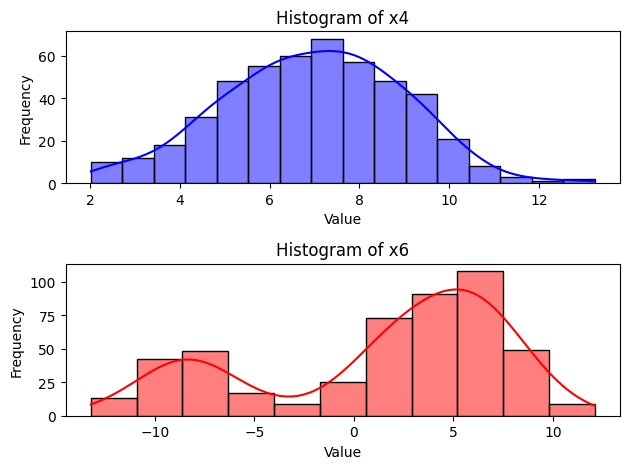

In [66]:

plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
sns.histplot(data=df, x='x4', color='blue', kde=True)
plt.title('Histogram of x4')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for Column 2
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot
sns.histplot(data=df, x='x6', color='red', kde=True)
plt.title('Histogram of x6')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

These histogram visualizations are intersting as they illustrate and validate the numerical data analysis presented in Section 1. Specifically, they highlight the distribution tendencies of different variables. For instance, the histogram for variable x4 clearly demonstrates its distribution's skew towards a mean of approximately 6.9. This visualization contrasts with that of variable x6, where the distribution is more evenly spread around a mean of 1.3. Unlike x4, x6 does not exhibit a pronounced skew towards any particular value range, indicating a more uniform distribution across the spectrum of observed values. 

Plot in the same figure the boxplot of two variables

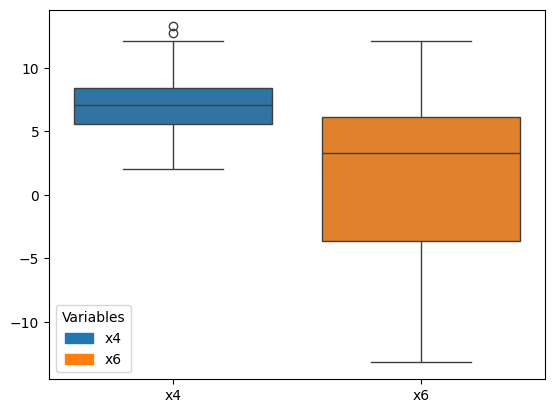

In [73]:
import matplotlib.patches as mpatches

sns.boxplot(data=df[['x4', 'x6']])

#  custom legend patches
patch_x4 = mpatches.Patch(color=sns.color_palette()[0], label='x4')
patch_x6 = mpatches.Patch(color=sns.color_palette()[1], label='x6')

# Add the custom patches to the legend
plt.legend(handles=[patch_x4, patch_x6], title="Variables")

plt.show()

Plot the scatter plot of two variables

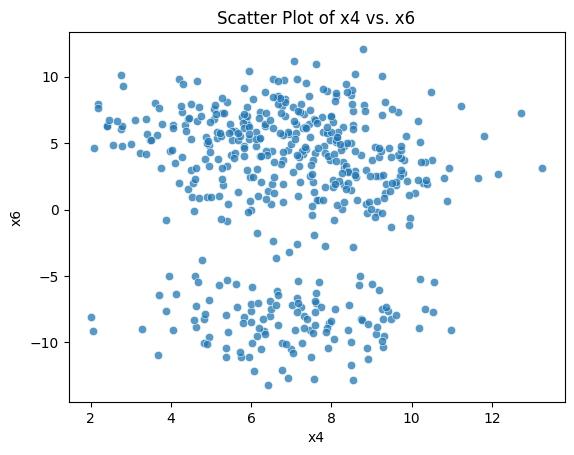

In [78]:

# The `scatterplot` function is used here for plotting
sns.scatterplot(data=df, x='x4', y='x6', alpha=0.75)

# Adding a title for clarity
plt.title('Scatter Plot of x4 vs. x6')

plt.show()


### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

By examining histograms, box plots, and scatter plots, we can glean valuable insights into our dataset, particularly when focusing on a subset of two variables (x4 and x6). It becomes evident that distribution tendencies vary across variables, resulting in distinct data distributions for each. For instance, in variable x4, we observe a broader distribution towards specific values, whereas variable x6 exhibits a wider spread of data. These disparities are effectively illustrated in the box plots and histograms, providing a comprehensive view of the dataset's characteristics.


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

Approach Description: To solve this section, we'll employ a method where the clustering is conducted on pairs of variables. This decision stems from the limitations of visualizing clusters formed by six variables. Given that scatter plots are typically visualized in two dimensions, attempting to represent six variables would necessitate visualizing the scatter plot in six dimensions, which is impractical. Therefore, we'll conduct separate clustering analyses using the KMeans method from the scikit-learn library on each pair of variables. This approach allows us to generate two separate scatter plots for each pair, providing clearer insights into the clustering patterns.

For each cluster analysis, we'll conduct clustering on all variables, followed by separate clustering on two distinct sets: (x1 vs x2) and (x3 vs x4). Due to dimensionality constraints with six variables, only the first and second sets will be visualized in a clustering scatter plot.

### Scatter plots for all variables

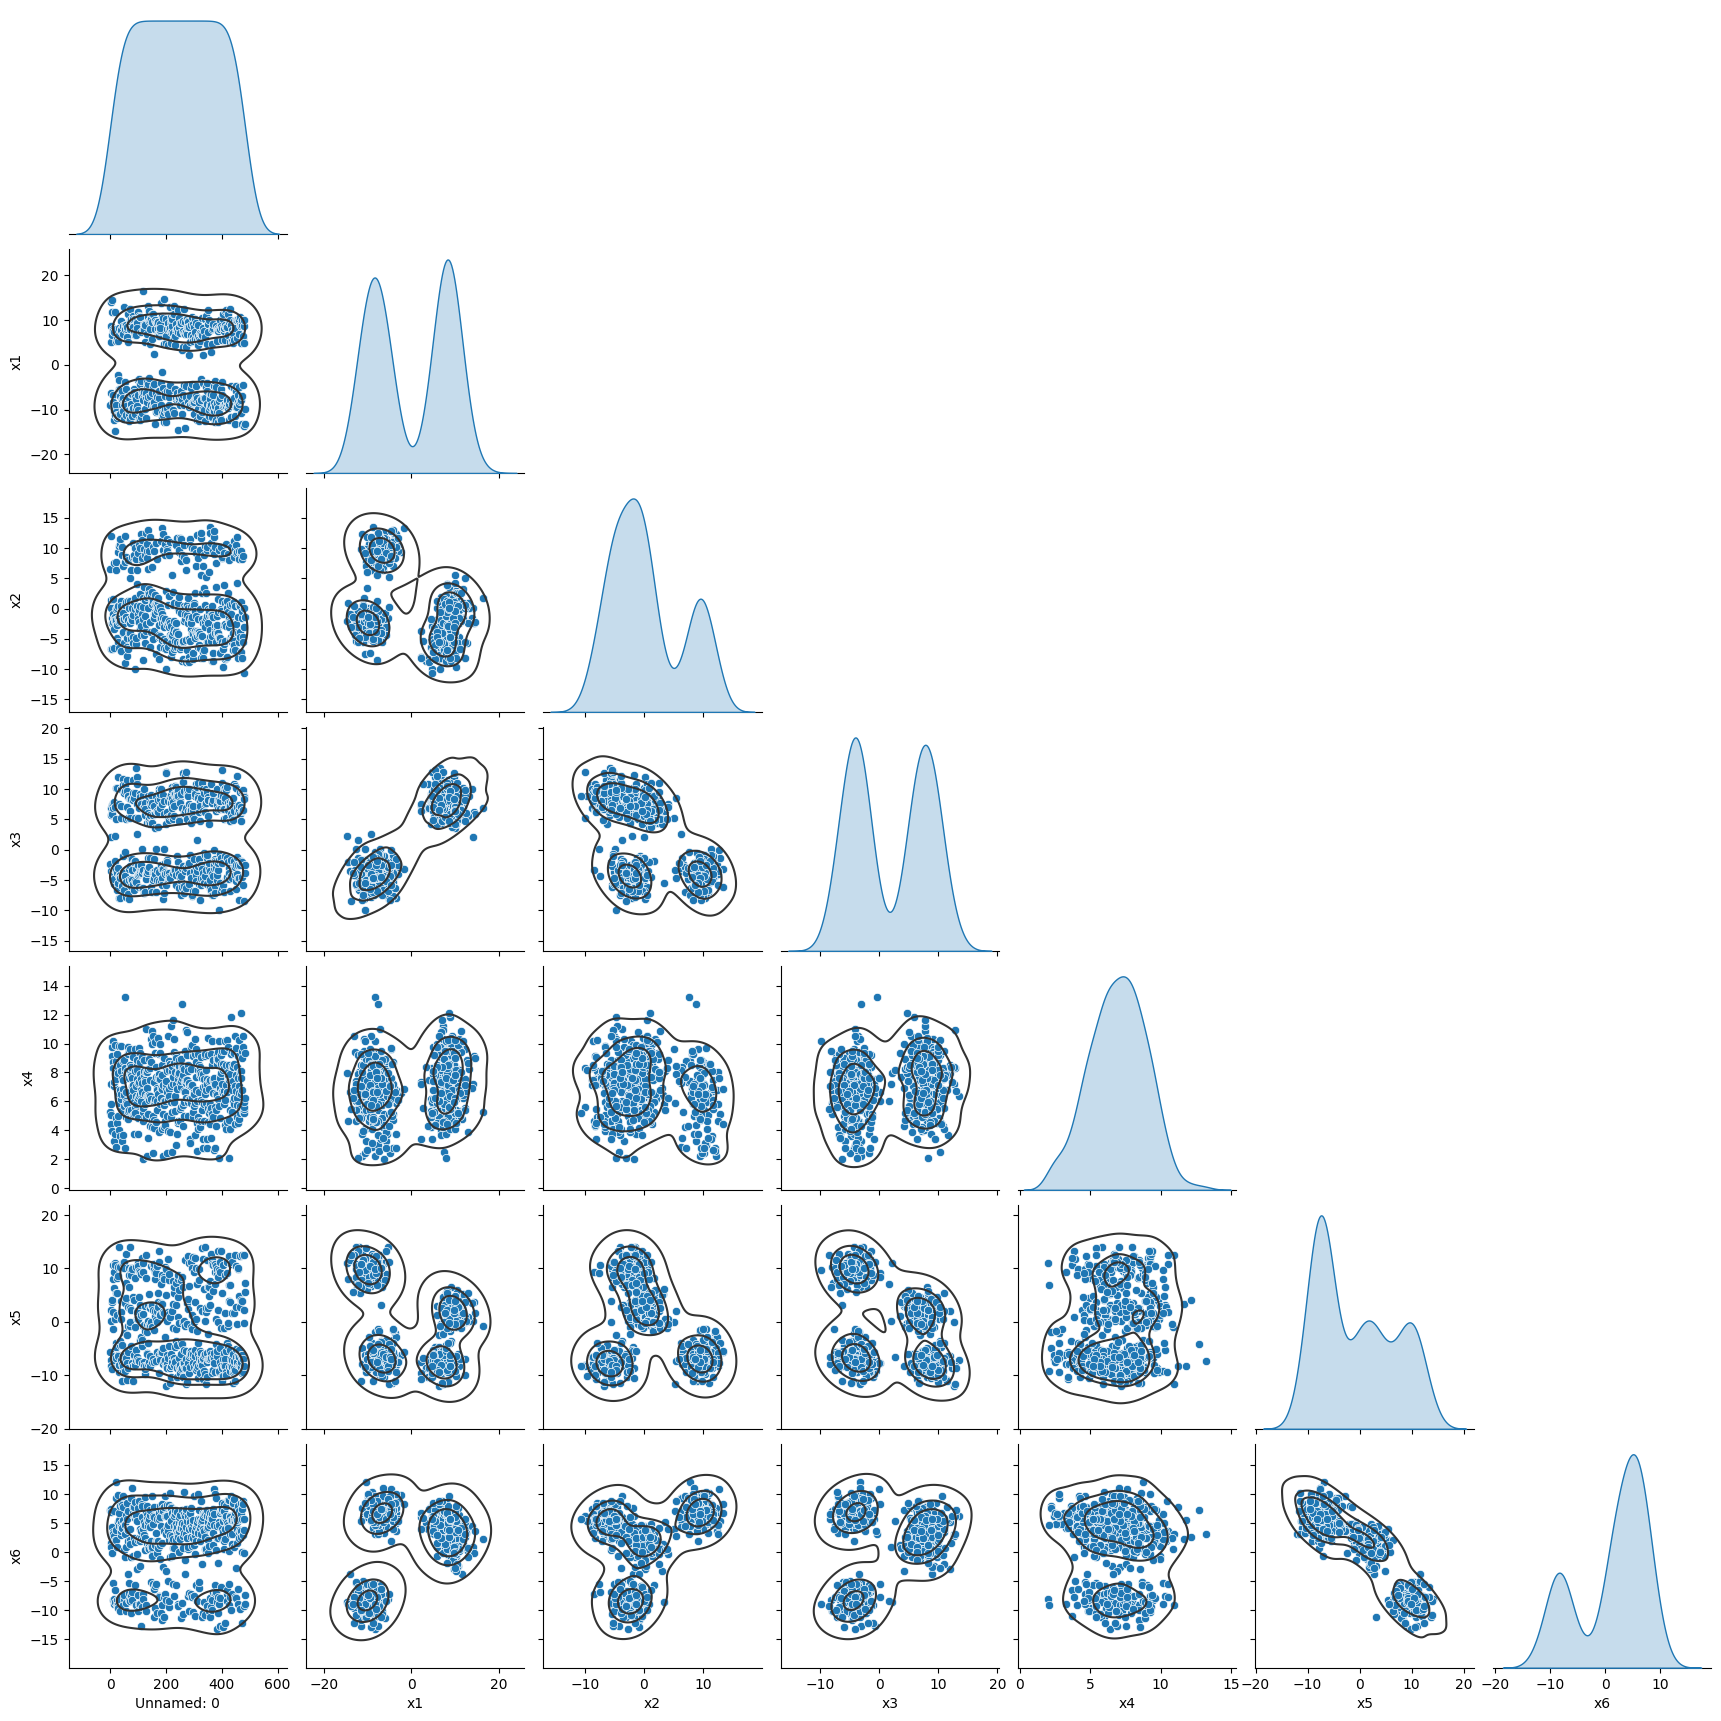

In [195]:
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

### **Scatter Plots from chosen variables**

Note: The selection of variables for clustering was made deliberately, with the intention of conducting the analysis in two distinct sets comprising pairs of variables. Specifically, I have paired x1 with x2 and x3 with x4 for this purpose.

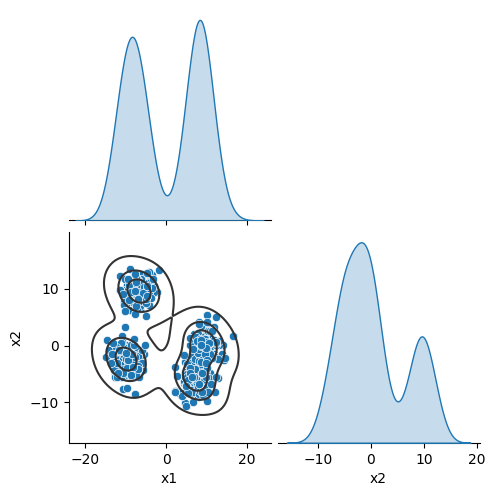

In [112]:
g = sns.pairplot(df[['x1','x2']], corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

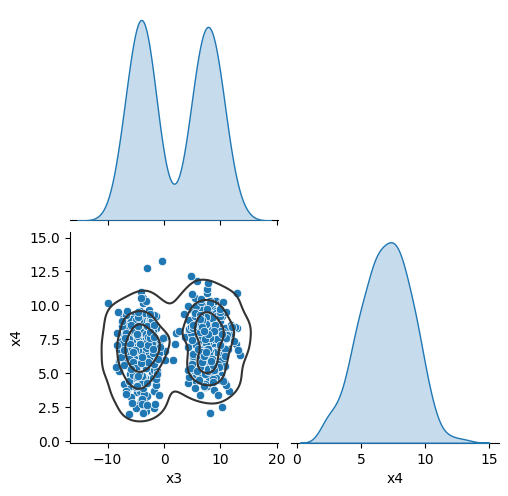

In [113]:
g = sns.pairplot(df[['x3','x4']], corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

### **Clustering for all variables**

In [196]:
K  = 4 # Let's assume there are 3 clusters

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### **Clustering of first set (x1 and x2)**

In [172]:
K  = 3 # Let's assume there are 3 clusters

# Create/Initialize the Kmeans box/object
km_first = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated_firstset = km_first.fit_predict(df[['x1', 'x2']])


# Print estimated cluster of each point in the dataset
yestimated_firstset

array([2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2,

### **Clustering of second set (x3 and x4)**


In [179]:
K  = 2 # Let's assume there are 2 clusters

# Create/Initialize the Kmeans box/object
km_second = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated_secondset = km_second.fit_predict(df[['x3', 'x4']])


# Print estimated cluster of each point in the dataset
yestimated_secondset

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

Add to your dataset a column with the estimated cluster to each data point

In [199]:

copy_df = df.copy()  # .copy() to create a copy of the subset DataFrame

copy_df.loc[:, 'Estimated_Cluster'] = yestimated
copy_df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,Estimated_Cluster
0,0,-9.057568,6.553517,-2.345535,5.268742,-5.674122,7.246045,0
1,1,5.150240,-6.631250,6.929999,5.063229,-7.103421,7.538583,0
2,2,8.713683,1.365881,5.701664,4.417548,2.304620,1.548344,0
3,3,-6.287309,11.942883,-3.584037,5.782358,-8.207444,6.957514,0
4,4,14.031601,0.033514,2.021836,7.172337,0.146299,1.010852,0
...,...,...,...,...,...,...,...,...
479,479,-13.727755,-3.078091,-8.483460,5.432385,12.422540,-9.234109,3
480,480,8.566503,0.121374,8.739944,5.574851,-0.276771,3.879525,3
481,481,9.875170,-3.095101,8.272779,5.920676,2.276206,-0.165893,3
482,482,-9.874675,-1.336498,-2.529602,9.364319,7.331738,-7.366881,3


In [173]:
# first set filtering 
# filtering the data frame to have x1, x2
cluster_variables_first_set = ['x1','x2']
filtered_df_firstset = df[cluster_variables_first_set].copy()  # .copy() to create a copy of the subset DataFrame

filtered_df_firstset.loc[:, 'Estimated_Cluster'] = yestimated_secondset
filtered_df_firstset

,x1,x2,Estimated_Cluster
0,-9.057568,6.553517,1
1,5.150240,-6.631250,0
2,8.713683,1.365881,0
3,-6.287309,11.942883,1
4,14.031601,0.033514,0
...,...,...,...
479,-13.727755,-3.078091,1
480,8.566503,0.121374,0
481,9.875170,-3.095101,0
482,-9.874675,-1.336498,1


In [180]:
# second set filtering 
# filtering the data frame to have x3, x4
cluster_variables_second_set = ['x3','x4']
filtered_df_secondset = df[cluster_variables_second_set].copy()  # .copy() to create a copy of the subset DataFrame

filtered_df_secondset.loc[:, 'Estimated_Cluster'] = yestimated_secondset
filtered_df_secondset

,x3,x4,Estimated_Cluster
0,-2.345535,5.268742,1
1,6.929999,5.063229,0
2,5.701664,4.417548,0
3,-3.584037,5.782358,1
4,2.021836,7.172337,0
...,...,...,...
479,-8.483460,5.432385,1
480,8.739944,5.574851,0
481,8.272779,5.920676,0
482,-2.529602,9.364319,1


Print the number associated to each cluster

In [200]:
# All variables 
print (f"The number associated to clusters of all variables is: {copy_df.Estimated_Cluster.unique()}")


The number associated to clusters of all variables is: [0 2 1 3]


In [185]:
# First set number association to each cluster
print (f"The number associated to clusters of the first set of variables is: {filtered_df_firstset.Estimated_Cluster.unique()}")

print (f"The number associated to clusters of the second set of variables is: {filtered_df_secondset.Estimated_Cluster.unique()}")

The number associated to clusters of the second set of variables is: [1 0]
The number associated to clusters of the second set of variables is: [1 0]


Print the centroids

In [202]:
# All variables 
print (f" The centroids of all variables are: {km.cluster_centers_}")

# First set centroids
print (f" The centroids of the first set are: {km_first.cluster_centers_}")

# Second set centroids
print (f" The centroids of the second set are: {km_second.cluster_centers_}")

 The centroids of all variables are: [[ 6.05000000e+01 -7.32742483e-01  9.79517505e-01  1.29619319e+00
   6.90308987e+00  4.84922854e-01  8.51095805e-01]
 [ 3.03000000e+02 -2.16862279e-01  2.10607560e-01  1.98948201e+00
   6.88884540e+00 -1.67997122e+00  1.31301634e+00]
 [ 1.82000000e+02  1.41664363e+00  6.89945399e-01  2.45332493e+00
   6.86596296e+00 -5.55499245e-01  1.71599800e+00]
 [ 4.23500000e+02 -4.67142375e-01 -2.40108056e-01  1.90006870e+00
   7.18139895e+00 -1.03388515e+00  1.45986287e+00]]
 The centroids of the first set are: [[-9.92728189 -2.47531642]
 [ 8.35756626 -2.72245619]
 [-6.79014919  9.57027077]]
 The centroids of the second set are: [[ 7.85485     7.30008353]
 [-4.13691644  6.61273445]]


Print the intertia metric

In [203]:
# First set inertia metric
print("Inertia of all variables:", km.inertia_)
print("Inertia first set of variables:", km_first.inertia_)
print("Inertia second set of variables:", km_second.inertia_)

Inertia of all variables: 710808.7415045653
Inertia first set of variables: 6552.249797805303
Inertia second set of variables: 3940.08577915255


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

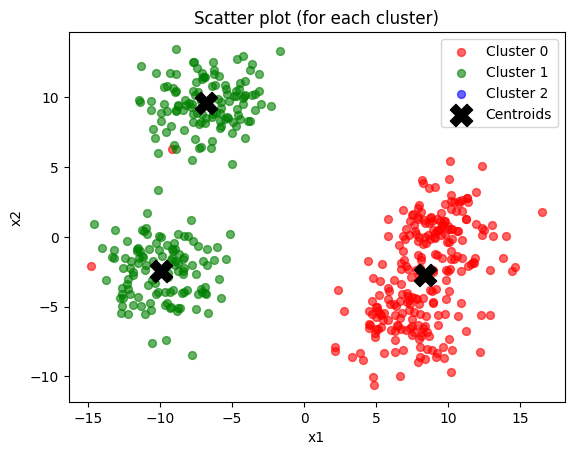

In [178]:
# First set scatter plot of clusters

df1 = filtered_df_firstset[filtered_df_firstset.Estimated_Cluster==0]
df2 = filtered_df_firstset[filtered_df_firstset.Estimated_Cluster==1]
df3 = filtered_df_firstset[filtered_df_firstset.Estimated_Cluster==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.6)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.6)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.6)

# Plot centrodides
plt.scatter(km_first.cluster_centers_[:,0], km_first.cluster_centers_[:,1], color='black', marker='X', label='Centroids', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

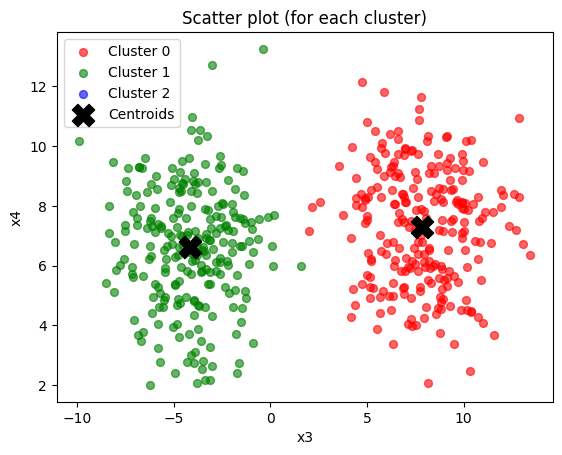

In [190]:
# second set scatter plot of clusters

df1 = filtered_df_secondset[filtered_df_secondset.Estimated_Cluster==0]
df2 = filtered_df_secondset[filtered_df_secondset.Estimated_Cluster==1]
df3 = filtered_df_secondset[filtered_df_secondset.Estimated_Cluster==2]

# Scatter plot of each cluster
plt.scatter(df1.x3, df1.x4, label='Cluster 0', c='r', marker='o', s=32, alpha=0.6)
plt.scatter(df2.x3, df2.x4, label='Cluster 1', c='g', marker='o', s=32, alpha=0.6)
plt.scatter(df3.x3, df3.x4, label='Cluster 2', c='b', marker='o', s=32, alpha=0.6)

# Plot centrodides
plt.scatter(km_second.cluster_centers_[:,0], km_second.cluster_centers_[:,1], color='black', marker='X', label='Centroids', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x3')
plt.ylabel('x4')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Through analysis of scatter plots for different clusters and examination of the KMeans algorithm results, we observe a significant disparity in the inertia metric. Comparing the inertia metrics across various clustering scenarios, we find the following:

* Inertia of clusters formed using all variables: 710808.7415045653
* Inertia of clusters formed using the second set of variables (two clusters): 3940.08577915255
* Inertia of clusters formed using the first set of variables (three clusters): 6552.249797805303
This disparity underscores the complexity introduced when clustering with multiple variables, resulting in higher inertia rates and highlighting the challenge of creating cohesive subsets of groups.

## A5 Elbow plot

Compute the Elbow plot

First set Elbow Plot

In [146]:
first_set = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    first_set.append(km.inertia_)


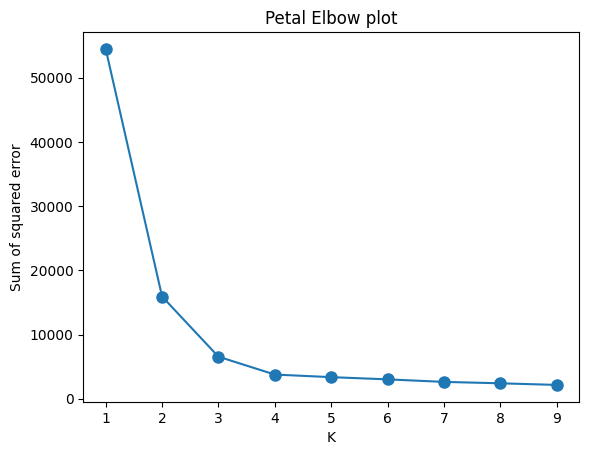

In [147]:
# Plot sse versus k
plt.plot(k_rng,first_set, 'o-', markersize=8)

plt.title('x1 vs x2')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Second set elbow plot


In [193]:
second_set = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x3','x4']])
    # Save sse for each k
    second_set.append(km.inertia_)



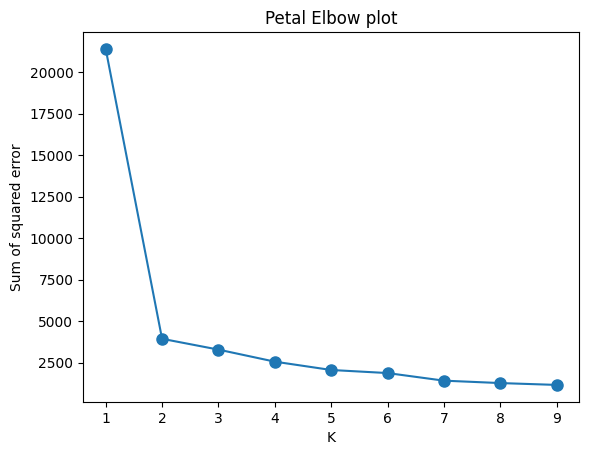

In [194]:
# Plot sse versus k
plt.plot(k_rng,second_set, 'o-', markersize=8)

plt.title('x3 vs x4')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: 

* In the first set of variables (x1 and x2), the optimal number of clusters appears to be 3, as evidenced by the elbow plot where we observe a distinct inflection point. At this juncture, we notice a significant increase in the SSE, indicating a clear delineation of clusters.

* Conversely, in the second set of variables (x3 and x4), the ideal number of clusters is 2. Similar to the first set, the elbow plot demonstrates an inflection point, beyond which we observe a noticeable rise in the SSE, reinforcing the effectiveness of two clusters in capturing the underlying patterns in the data.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
The initial scatter plot comparisons for each set of variables laid a foundational reference for our clustering analysis. These scatter plots provided valuable insights, guiding the initial assumptions regarding the presence of distinct clusters. Notably, in the case of variables x1 and x2, the scatter plot revealed the emergence of three discernible groups, while for x3 and x4, two distinct groups were evident. Subsequent clustering using the KMeans algorithm confirmed and solidified these hypotheses. The elbow plot further validated the findings, demonstrating notable differences in cluster spreads as we varied the number of clusters (k) across both variable sets.


# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

La interpretación de datos y sus relaciones es crucial, ya que sin comprender los datos, perderíamos oportunidades valiosas. A través de esta formación, adquirí habilidades para interpretar datos de manera numérica y visual, utilizando diversas representaciones como histogramas, diagramas de caja y gráficos de dispersión. Estas técnicas no solo me permitieron visualizar la información, sino también comprender la complejidad de los fenómenos y sus variables cuantitativas. Esto facilitó la formulación de hipótesis e inferencias que luego se utilizaron para operaciones más avanzadas, ayudándome a comprender mejor las relaciones entre los datos y su interconexión.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Esta formación me brindó un amplio contexto sobre la naturaleza de los datos, permitiéndome comprender cómo pueden relacionarse para crear funciones de entrada y salida a través de métodos matemáticos. Además, me capacitó para analizar los datos de manera exhaustiva y desarrollar modelos bivariados que capturan el comportamiento de fenómenos complejos.

Durante el curso, adquirí la habilidad de comprender en profundidad los conjuntos de datos que estábamos analizando. Utilizando herramientas visuales como histogramas, gráficos de dispersión y diagramas de caja, pude formular hipótesis e inferencias significativas. También fue fundamental aprender a organizar los datos y realizar operaciones eficientes en los marcos de datos.

Finalmente, la formación me proporcionó una sólida comprensión de la construcción de modelos bivariados, incluyendo técnicas como el clustering con k-means y la formulación de hipótesis mediante herramientas computacionales. Esto me permitió construir modelos y comprender la interconexión entre diferentes aspectos del análisis de datos.